In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab

%matplotlib inline

## Read the training dataset
train_ds = pd.read_csv('train.csv')
train_ds.drop('Id',axis=1,inplace=True)

## Adjust pandas setting to display all the columns of the dataset
pd.set_option('display.max_columns',None)

In [417]:
## Print the shape of the dataset
train_ds.shape

(1460, 80)

In [418]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

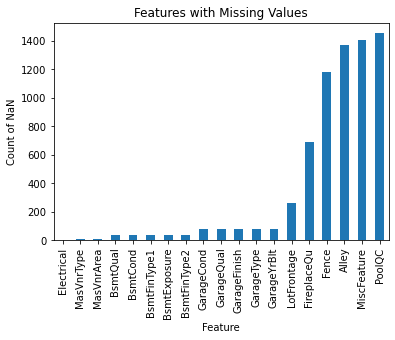

In [419]:
## Find count of missing values
features_na = train_ds.isna().sum()
features_na = features_na[features_na>0]
features_na.sort_values(inplace=True)
features_na.plot(kind='bar',title='Features with Missing Values',xlabel='Feature',ylabel='Count of NaN')
plt.show()

#### Cleaning Data and take care of missing values 

In [420]:
# Find Numerical Features
numerical_ds_column_names = train_ds.describe().columns
df = train_ds[numerical_ds_column_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [435]:
# Find Numerical Features

numerical_f = [feature for feature in train_ds.columns if train_ds[feature].dtypes != 'object' and feature not in ['SalePrice','Id']]
print("Total No Of Numerical Features:",len(numerical_f))

## print the numerical features top5 records
train_ds[numerical_f].head()

Total No Of Numerical Features: 36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [436]:
## Find the numerical features with missing values
nf_na = [feature for feature in features_na.index if train_ds[feature].dtypes != 'O']
nf_na

['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

In [437]:
train_ds[nf_na].describe()

,MasVnrArea,GarageYrBlt,LotFrontage
count,1391.000000,1391.000000,1391.000000
mean,100.303379,1978.865564,68.856219
std,173.040603,24.029446,19.052280
min,0.000000,1900.000000,21.000000
25%,0.000000,1962.500000,60.000000
50%,0.000000,1980.000000,69.000000
75%,163.500000,2001.000000,78.000000
max,1600.000000,2010.000000,182.000000


In [438]:
#Replace the numerical feature missing values with Median
for feature in nf_na:
    train_ds[feature].fillna(train_ds[feature].median(),inplace=True)
    
train_ds[nf_na].isna().any()

MasVnrArea     False
GarageYrBlt    False
LotFrontage    False
dtype: bool

In [425]:
## Find Categorical Features
categorical_f = [feature for feature in train_ds.columns if train_ds[feature].dtypes == 'object' and feature not in ['SalePrice','Id']]
print("Total No Of Categorical Features:",len(categorical_f))

## print the categorical features top5 records
train_ds[categorical_f].head()

Total No Of Categorical Features: 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [439]:
## Find the categorical features with missing values
cf_na = [feature for feature in features_na.index if train_ds[feature].dtypes == 'O']
cf_na

['Electrical',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtExposure',
 'BsmtFinType2',
 'GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'FireplaceQu',
 'Fence',
 'Alley',
 'MiscFeature',
 'PoolQC']

In [440]:
train_ds[cf_na].describe()

,Electrical,MasVnrType,BsmtQual,BsmtCond,BsmtFinType1,BsmtExposure,BsmtFinType2,GarageCond,GarageQual,GarageFinish,GarageType,FireplaceQu,Fence,Alley,MiscFeature,PoolQC
count,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391
unique,6,4,5,5,7,5,7,6,6,4,7,6,5,3,5,4
top,SBrkr,None,TA,TA,Unf,No,Unf,TA,TA,Unf,Attchd,None,None,None,None,None
freq,1267,829,619,1248,415,929,1202,1259,1247,578,821,679,1119,1300,1341,1387


In [441]:
## Replace the missing value with None

for feature in cf_na:
    train_ds[feature].fillna('None',inplace=True)
    
train_ds[cf_na].isna().any()

Electrical      False
MasVnrType      False
BsmtQual        False
BsmtCond        False
BsmtFinType1    False
BsmtExposure    False
BsmtFinType2    False
GarageCond      False
GarageQual      False
GarageFinish    False
GarageType      False
FireplaceQu     False
Fence           False
Alley           False
MiscFeature     False
PoolQC          False
dtype: bool

In [442]:
train_ds.isna().any().sum()

0

In [443]:
train_ds.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.00000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,56.962617,68.856219,9272.537024,6.091301,5.577283,1971.557872,1984.989216,100.303379,430.020848,43.389648,568.539899,1041.950395,1145.184040,338.979152,5.097052,1489.260244,0.413372,0.056075,1.557153,0.378864,2.859094,1.046729,6.473760,0.585191,1978.865564,1.74982,466.846873,90.616104,45.171819,21.656362,3.025162,14.442847,1.652049,38.414091,6.328541,2007.824587,178136.292595
std,42.321925,19.052280,3196.732418,1.371709,1.105071,30.301757,20.676905,173.040603,425.617348,153.444567,442.508797,410.119186,362.979555,426.406275,44.502186,485.856071,0.508426,0.236318,0.541252,0.501321,0.805727,0.221120,1.578815,0.628836,24.029446,0.74955,210.193878,119.725354,63.498462,59.418996,28.078950,54.195152,30.877684,456.669597,2.694099,1.325782,75793.167741
min,20.000000,21.000000,1491.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7429.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,226.000000,793.000000,874.500000,0.000000,0.000000,1122.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.500000,1.00000,313.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,50.000000,69.000000,9286.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,378.000000,0.000000,480.000000,980.000000,1077.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,474.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,78.000000,11231.500000,7.000000,6.000000,2001.000000,2004.000000,163.500000,698.500000,0.000000,802.000000,1268.000000,1362.000000,726.000000,0.000000,1751.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.00000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,210000.000000
max,190.000000,182.000000,17671.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,528.000000,4476.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.00000,1390.000000,736.000000,547.000000,386.000000,508.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


#### Removing outlires

In [444]:
Lower_limit=train_ds['LotArea'].quantile(0.05)
Upper_limit=train_ds['LotArea'].quantile(0.95)
train_ds[(train_ds['LotArea'] < Upper_limit)&(train_ds['LotArea'] > Lower_limit)]
Q1= train_ds['LotArea'].quantile(0.25)
Q3=train_ds['LotArea'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3,IQR)

7429.0 11231.5 3802.5


In [432]:
train_ds = train_ds[(train_ds['LotArea'] < (Q3 + 1.5 * IQR)) & (train_ds['LotArea'] > (Q1 - 1.5 * IQR))]
print(train_ds.shape)

(1391, 80)


In [445]:
Lower_limit=train_ds['LotFrontage'].quantile(0.05)
Upper_limit=train_ds['LotFrontage'].quantile(0.95)
train_ds[(train_ds['LotFrontage'] < Upper_limit)&(train_ds['LotFrontage'] > Lower_limit)]
Q1= train_ds['LotFrontage'].quantile(0.25)
Q3=train_ds['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3,IQR)

60.0 78.0 18.0


<AxesSubplot:xlabel='LotFrontage'>

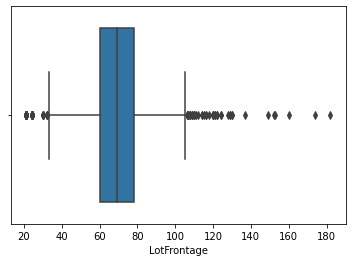

In [434]:
import seaborn as sns
sns.boxplot(x=train_ds['LotFrontage'])

In [446]:
train_ds.skew().sort_values()

GarageYrBlt      -0.691478
YearBuilt        -0.615396
YearRemodAdd     -0.517243
GarageCars       -0.335485
LotArea          -0.074955
FullBath          0.017248
GarageArea        0.059917
YrSold            0.086943
OverallQual       0.171832
MoSold            0.220766
BedroomAbvGr      0.310379
TotalBsmtSF       0.528716
LotFrontage       0.536946
BsmtFullBath      0.565500
TotRmsAbvGrd      0.636469
Fireplaces        0.667221
OverallCond       0.673582
HalfBath          0.687904
BsmtFinSF1        0.774531
2ndFlrSF          0.776690
GrLivArea         0.879003
1stFlrSF          0.913498
BsmtUnfSF         0.941764
MSSubClass        1.386346
WoodDeckSF        1.443355
SalePrice         1.694126
OpenPorchSF       2.355782
MasVnrArea        2.580810
EnclosedPorch     2.857397
ScreenPorch       4.174311
BsmtHalfBath      4.186909
BsmtFinSF2        4.407089
KitchenAbvGr      4.486830
LowQualFinSF      9.568440
3SsnPorch        11.190466
PoolArea         18.779566
MiscVal          28.716412
d

In [447]:
### Skew the numerical features

nf_not_skewed = [feature for feature in numerical_f if train_ds[feature].skew() > 0.49 or train_ds[feature].skew() < -0.50 ]
### Create new feature with log transformation of above nf

train_ske_ds = train_ds.copy()
train_ske_ds.drop(nf_not_skewed,inplace=True,axis=1)
for feature in nf_not_skewed:
    train_ske_ds[feature+'Log'] = np.log(train_ds[feature]+1)
train_ske_ds.shape

(1391, 80)

In [448]:
train_new_ds = pd.get_dummies(train_ske_ds)
train_new_ds.shape

(1391, 298)

In [335]:
train_new_ds.head()

,LotArea,OverallQual,FullBath,BedroomAbvGr,GarageCars,GarageArea,MoSold,YrSold,SalePrice,MSSubClassLog,LotFrontageLog,OverallCondLog,YearBuiltLog,YearRemodAddLog,MasVnrAreaLog,BsmtFinSF1Log,BsmtFinSF2Log,BsmtUnfSFLog,TotalBsmtSFLog,1stFlrSFLog,2ndFlrSFLog,LowQualFinSFLog,GrLivAreaLog,BsmtFullBathLog,BsmtHalfBathLog,HalfBathLog,KitchenAbvGrLog,TotRmsAbvGrdLog,FireplacesLog,GarageYrBltLog,WoodDeckSFLog,OpenPorchSFLog,EnclosedPorchLog,3SsnPorchLog,ScreenPorchLog,PoolAreaLog,MiscValLog,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,Garage

#### Add new features

In [477]:
### Create new Features

## OverallQual and OverallCond both represent the quality of the house. Sum them both to create a new feature 
## TotalHseGrade

train_ds['TotalHseGrade'] = train_ds['OverallQual'] + train_ds['OverallCond']

## Total Bathrooms is split into many features. Sum them all to create a new feature 
## TotalHseBath
train_ds['TotalHseBath'] = train_ds['BsmtFullBath'] + (train_ds['BsmtHalfBath']/2) + train_ds['FullBath'] + \
(train_ds['HalfBath']/2)

## Create a new feature called TotalHseSF to get the overall Square Feet of the House
train_ds['TotalHSeSF'] = train_ds['TotalBsmtSF'] + train_ds['1stFlrSF'] + train_ds['2ndFlrSF']
train_ds['Ageofhouse']= train_ds['YrSold'] - train_ds['YearBuilt']
train_ds["TotalAboveGround"] = train_ds['BedroomAbvGr'] + train_ds['KitchenAbvGr'] + train_ds['TotRmsAbvGrd']
numerical_f.append('TotalHseGrade')
numerical_f.append('TotalHseBath')
numerical_f.append('TotalHSeSF')
numerical_f.append('Ageofhouse')
numerical_f.append('TotalAboveGround')
train_ds.shape

(1391, 89)

##### Feature Selection

In [478]:
## Select Features that have strong relationship with Sale Price
## Correlation above 0.4 is considered to be strong

strong_f = train_new_ds.corr()['SalePrice']
strong_f = strong_f [strong_f > 0.4]
strong_f.drop('SalePrice',inplace=True)

len(strong_f.sort_values())

23

#### Corrolation matrix best featuers

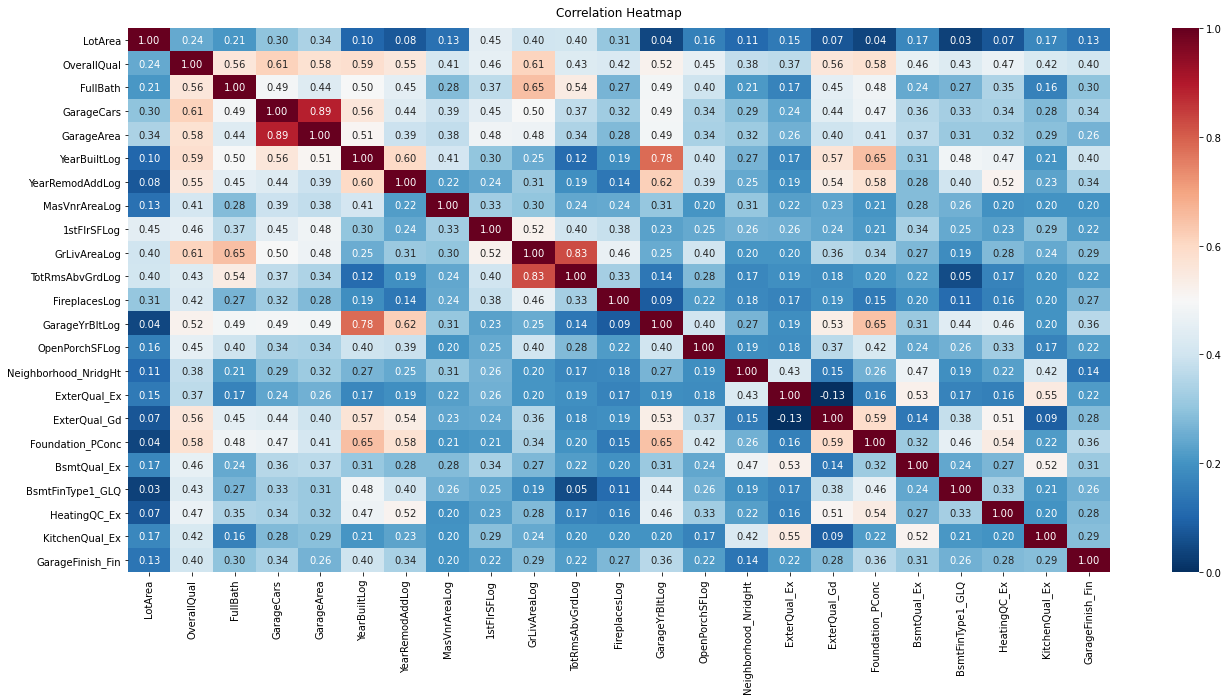

In [479]:
## Find features with strong correlation with other features

plt.figure(figsize=(22,10))
heatmap = sns.heatmap(train_new_ds[strong_f.index].corr(), vmin=0, vmax=1, annot=True, fmt='.2f', cmap= 'RdBu_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [461]:
from sklearn.preprocessing import StandardScaler
train_ds['zscore']=StandardScaler().fit_transform(train_ds.loc[: ,['SalePrice']].values)
train_ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalHseGrade,TotalHseBath,TotalHSeSF,Ageofhouse,TotalAboveGround,zscore,log(x+1)
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12,3.5,2566,5,12,0.400757,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,14,2.5,2524,31,10,0.044396,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12,3.5,2706,7,10,0.598735,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,12,2.0,2473,91,11,-0.503344,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,13,3.5,3343,8,14,0.948496,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000,11,2.5,2600,8,11,-0.041395,12.072547
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000,12,3.0,3615,32,11,0.420555,12.254868
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,G

In [480]:
train_ds['log(x+1)'] = (train_ds['SalePrice']+1).transform(np.log)
train_ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalHseGrade,TotalHseBath,TotalHSeSF,Ageofhouse,TotalAboveGround,zscore,log(x+1),normalized,standardized
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12,3.5,2566,5,12,0.400757,12.247699,0.244473,0.400613
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,14,2.5,2524,31,10,0.044396,12.109016,0.206450,0.044380
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12,3.5,2706,7,10,0.598735,12.317171,0.265596,0.598520
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,12,2.0,2473,91,11,-0.503344,11.849405,0.148007,-0.503163
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,13,3.5,3343,8,14,0.948496,12.429220,0.302915,0.948155


In [463]:
train_ds['normalized'] = (train_ds['SalePrice'] - train_ds['SalePrice'].min()) / (train_ds['SalePrice'].max() - train_ds['SalePrice'].min())
train_ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalHseGrade,TotalHseBath,TotalHSeSF,Ageofhouse,TotalAboveGround,zscore,log(x+1),normalized
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12,3.5,2566,5,12,0.400757,12.247699,0.244473
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,14,2.5,2524,31,10,0.044396,12.109016,0.206450
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12,3.5,2706,7,10,0.598735,12.317171,0.265596
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,12,2.0,2473,91,11,-0.503344,11.849405,0.148007
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,13,3.5,3343,8,14,0.948496,12.429220,0.302915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000,11,2.5,2600,8,11,-0.041395,12.072547,0.197296
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000,12,3.0,3615,32,11,0.420555,12.254868,0.246585
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fa

In [481]:
train_ds['standardized'] = (train_ds['SalePrice'] - train_ds['SalePrice'].mean()) / train_ds['SalePrice'].std()
train_ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalHseGrade,TotalHseBath,TotalHSeSF,Ageofhouse,TotalAboveGround,zscore,log(x+1),normalized,standardized
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12,3.5,2566,5,12,0.400757,12.247699,0.244473,0.400613
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,14,2.5,2524,31,10,0.044396,12.109016,0.206450,0.044380
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12,3.5,2706,7,10,0.598735,12.317171,0.265596,0.598520
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,12,2.0,2473,91,11,-0.503344,11.849405,0.148007,-0.503163
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,13,3.5,3343,8,14,0.948496,12.429220,0.302915,0.948155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000,11,2.5,2600,8,11,-0.041395,12.072547,0.197296,-0.041380
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000,12,3.0,3615,32,11,0.420555,12.254868,0.246585,0.420

In [482]:
indecies = np.where(correlation_matrix['SalePrice'] > 0.4)
improved_features = correlation_matrix.iloc[indecies].drop('SalePrice')
improved_features['SalePrice']
new_features_spearman = list(improved_features.index)
new_features_spearman

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF']

In [483]:
from sklearn.preprocessing import StandardScaler
train_ds['zscore']=StandardScaler().fit_transform(train_ds.loc[: ,['SalePrice']].values)
train_ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalHseGrade,TotalHseBath,TotalHSeSF,Ageofhouse,TotalAboveGround,zscore,log(x+1),normalized,standardized
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12,3.5,2566,5,12,0.400757,12.247699,0.244473,0.400613
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,14,2.5,2524,31,10,0.044396,12.109016,0.206450,0.044380
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12,3.5,2706,7,10,0.598735,12.317171,0.265596,0.598520
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,12,2.0,2473,91,11,-0.503344,11.849405,0.148007,-0.503163
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,13,3.5,3343,8,14,0.948496,12.429220,0.302915,0.948155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000,11,2.5,2600,8,11,-0.041395,12.072547,0.197296,-0.041380
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000,12,3.0,3615,32,11,0.420555,12.254868,0.246585,0.420

In [484]:
train_ds.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [485]:
### Check the Skewness of the numerical feature

train_ds.skew().sort_values()

GarageYrBlt         -0.691478
YearBuilt           -0.615396
TotalHseGrade       -0.529720
YearRemodAdd        -0.517243
GarageCars          -0.335485
LotArea             -0.074955
FullBath             0.017248
GarageArea           0.059917
log(x+1)             0.070715
YrSold               0.086943
OverallQual          0.171832
MoSold               0.220766
TotalHseBath         0.242816
BedroomAbvGr         0.310379
TotalBsmtSF          0.528716
LotFrontage          0.536946
BsmtFullBath         0.565500
Ageofhouse           0.611893
TotRmsAbvGrd         0.636469
Fireplaces           0.667221
OverallCond          0.673582
TotalAboveGround     0.685828
HalfBath             0.687904
TotalHSeSF           0.726822
BsmtFinSF1           0.774531
2ndFlrSF             0.776690
GrLivArea            0.879003
1stFlrSF             0.913498
BsmtUnfSF            0.941764
MSSubClass           1.386346
WoodDeckSF           1.443355
SalePrice            1.694126
normalized           1.694126
zscore    

#### Binng

In [515]:
from sklearn.preprocessing import KBinsDiscretizer
bins2 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
ftr = np.array(train_ds["LotFrontage"]).reshape(-1,1)
bins2.fit(ftr)
train_ds["LotFrontage"] = LotFrontage_bins


In [516]:
from sklearn.preprocessing import KBinsDiscretizer
bins1 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
ftr = np.array(train_ds["LotArea"]).reshape(-1,1)
bins1.fit(ftr)
LotArea_bins = bins1.transform(ftr)
train_ds["LotArea"] = LotArea_bins

## Model evaluation

In [517]:
train_new_ds = pd.get_dummies(train_ske_ds)
train_new_ds.shape

(1391, 298)

#### Random Forrest Regressor

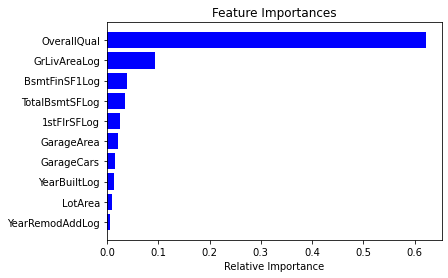

In [518]:
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt
x = train_new_ds.drop(["SalePrice"],axis=1).values
y = train_new_ds["SalePrice"]
model = RandomForestRegressor(n_estimators=100)
model.fit(x,y)
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_new_ds.columns.values))))
features = train_new_ds.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [519]:
random_for_ftr = [features[i] for i in indices]
random_for_ftr

['YearRemodAddLog',
 'LotArea',
 'YearBuiltLog',
 'GarageCars',
 'GarageArea',
 '1stFlrSFLog',
 'TotalBsmtSFLog',
 'BsmtFinSF1Log',
 'GrLivAreaLog',
 'OverallQual']

In [578]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap
%matplotlib inline
import matplotlib.pyplot as plt
pipe = make_pipeline(StandardScaler(),RandomForestRegressor())
x = train_new_ds.drop("SalePrice",axis=1).values
y = train_new_ds["SalePrice"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared Error:', rse)
RFR_improved = pd.DataFrame({"RFR_improvement":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 16149.881961722489
Mean Squared Error: 615663588.9529368
Root Mean Squared Error: 24812.56917275873
R-squared Error: 0.8887697893578546


#### LinearRegression Model Build

In [660]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

scaler = StandardScaler()

X = train_new_ds[strong_f.index]
y = np.log(train_new_ds['SalePrice'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [661]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)
lr_y_pred = LR.predict(X_test_scaled)

#### LinearRegression Model Evaluation

In [752]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, lr_y_pred))

model_score = {'Before Improvement': {'Linear Regression': float() ,'KNN': float() ,'SVR': float()},
               'After Improvement': {'Linear Regression': float(),'KNN': float() ,'SVR': float()}}

model_score['Before Improvement']['Linear Regression'] = np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))

model = {'Actual':y_test, 'Predicted':lr_y_pred}

Mean Absolute Error: 0.09856604268572614
Mean Squared Error: 0.01837351486046187
Root Mean Squared Error: 0.135548938986854
R-squared Error: 0.8782559827820685


#### KNNRegression Model Build

In [753]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)
lr_y_pred = LR.predict(X_test_scaled)

#### KNNRegression Model Evaluation

In [754]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, lr_y_pred))

model_score = {'Before Improvement': {'Linear Regression': float() ,'KNN': float() ,'SVR': float()},
               'After Improvement': {'Linear Regression': float(),'KNN': float() ,'SVR': float()}}

model_score['Before Improvement']['Linear Regression'] = np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))




Mean Absolute Error: 0.09856604268572614
Mean Squared Error: 0.01837351486046187
Root Mean Squared Error: 0.135548938986854
R-squared Error: 0.8782559827820685


In [755]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 3)
KNN.fit(X_train_scaled,y_train)
knn_y_pred = KNN.predict(X_test_scaled)

In [756]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, knn_y_pred))

model_score['Before Improvement']['KNN'] = np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))



Mean Absolute Error: 0.1213925163691213
Mean Squared Error: 0.02776969017593453
Root Mean Squared Error: 0.16664240209482858
R-squared Error: 0.8159963586395352


#### SVR Model Build

In [757]:
from sklearn.svm import SVR
SVRS = SVR(kernel='linear', gamma='scale')
SVRS.fit(X_train_scaled,y_train)
svrs_y_pred = SVRS.predict(X_test_scaled)

#### SVR Model Evaluation

In [758]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svrs_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svrs_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svrs_y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, svrs_y_pred))

model_score['Before Improvement']['SVR'] = np.sqrt(metrics.mean_squared_error(y_test, svrs_y_pred))

model = {'Actual':y_test, 'Predicted':svrs_y_pred}


Mean Absolute Error: 0.09676641847784706
Mean Squared Error: 0.018074090210985
Root Mean Squared Error: 0.1344399130131562
R-squared Error: 0.8802399885620311


In [759]:
train_ds_wout = train_new_ds.copy()

for index in outlier_index:
    train_ds_wout.drop(index,inplace=True)

In [760]:
scaler = StandardScaler()
 
X = train_ds_wout[strong_f.index]
y = np.log(train_ds_wout['SalePrice'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [761]:
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)
lr_y_pred = LR.predict(X_test_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, lr_y_pred))

model_score['After Improvement']['Linear Regression'] = np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))

model = {'Actual':y_test, 'Predicted':lr_y_pred}

Mean Absolute Error: 0.09856604268572614
Mean Squared Error: 0.01837351486046187
Root Mean Squared Error: 0.135548938986854
R-squared Error: 0.8782559827820685


In [762]:
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(X_train_scaled,y_train)
knn_y_pred = KNN.predict(X_test_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, knn_y_pred))

model_score['After Improvement']['KNN'] = np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))

model = {'Actual':y_test, 'Predicted':knn_y_pred}

Mean Absolute Error: 0.11814029076991214
Mean Squared Error: 0.02607319200749455
Root Mean Squared Error: 0.16147195424436575
R-squared Error: 0.8272374577867212


In [763]:
SVRS = SVR(kernel='linear', gamma='scale')
SVRS.fit(X_train_scaled,y_train)
svrs_y_pred = SVRS.predict(X_test_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svrs_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svrs_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svrs_y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, svrs_y_pred))

model_score['After Improvement']['SVR'] = np.sqrt(metrics.mean_squared_error(y_test, svrs_y_pred))

model = {'Actual':y_test, 'Predicted':svrs_y_pred}

Mean Absolute Error: 0.09676641847784706
Mean Squared Error: 0.018074090210985
Root Mean Squared Error: 0.1344399130131562
R-squared Error: 0.8802399885620311


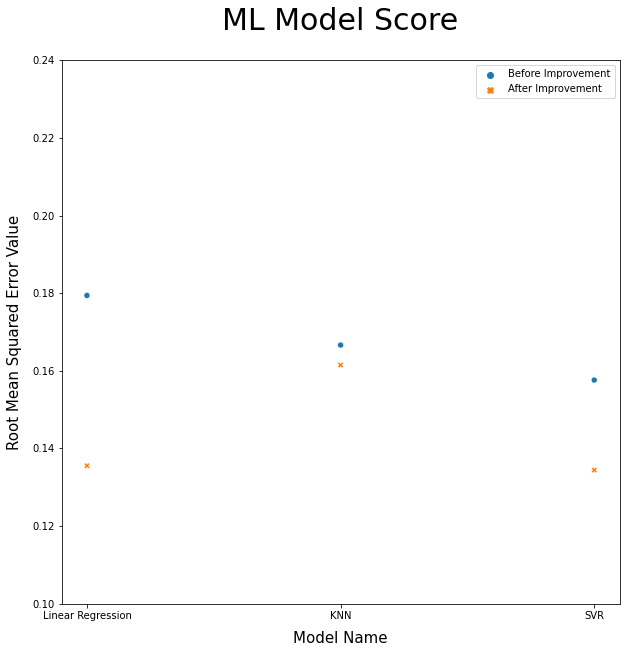

,Before Improvement,After Improvement
Linear Regression,0.179407,0.135549
KNN,0.166642,0.161472
SVR,0.157622,0.134440


In [764]:
plt.figure(figsize=(10,10))
plt.xlabel('Model Name', fontdict = {'fontsize' : 15} ,labelpad=10)
plt.ylabel('Root Mean Squared Error Value', fontdict = {'fontsize' : 15}, labelpad=10)
plt.ylim(0.10,0.24)
sns.scatterplot(data=pd.DataFrame(model_score))
plt.title('ML Model Score',fontdict = {'fontsize' : 30}, pad=30)
plt.show()
pd.DataFrame(model_score)


 ### Summary:

* Replaced missing values with appropraite values
* Created the following new features:
    - **TotalHseGrade**
    - **TotalHseBath**
    - **TotalHSeSF**
    - **GrLivAreaLog**
    - **TotRmsAbvGrdLog**
    - **OpenPorchSFLog**
    - **MasVnrAreaLog**
* Used Feature Importance and selected 24 features
* Built the following 3 ML Algorithms:
    - **Linear Regression**
    - **KNN Regression**
    - **SVM for Regression**
* Evalulated the Model's and removed the outliers to improve the performance


| Model Name        | Before Improvement | After Improvement |
|-------------------|--------------------|-------------------|
| Linear Regression | 0.179407           | 0.135549          |
| KNN Regression    | 0.166642           | 0.161472          |
| SVR               | 0.157622           | 0.134440          |


### Model interpretation using shaply

In [497]:

scaler = StandardScaler()
clf = RandomForestRegressor()
x = train_new_ds.drop("SalePrice",axis=1)
y = train_new_ds["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 15876.324258373204
Mean Squared Error: 606222342.124778
Root Mean Squared Error: 24621.582851733518
R-squared Error: 0.8904755128930186


In [399]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


#### Feature importance

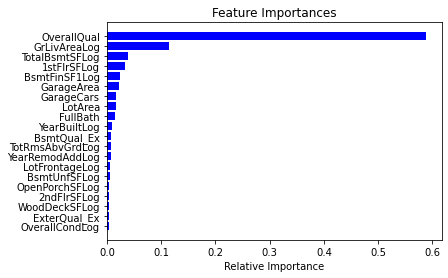

In [498]:
importances = clf.feature_importances_
indices = np.argsort(importances)[-20:] 
features = x_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### SHAP Model

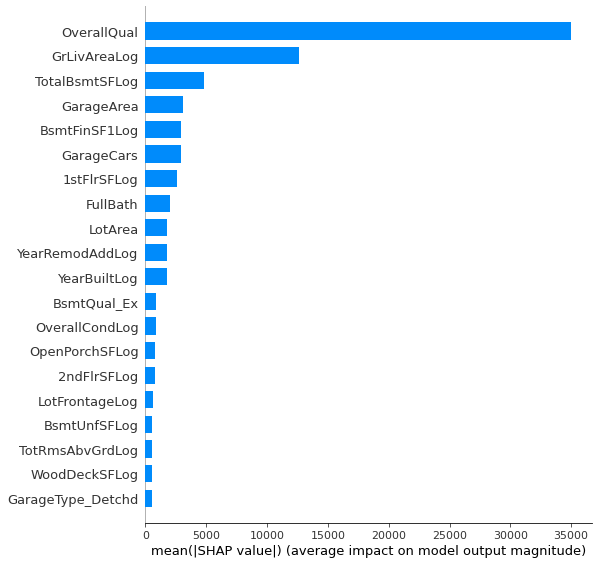

In [499]:
import shap
shap_values = shap.TreeExplainer(clf).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

#### SHAP Plot Summary

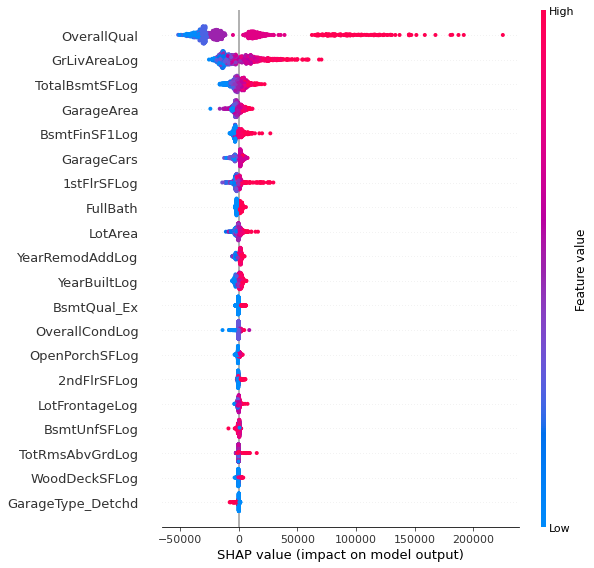

In [500]:
shap.summary_plot(shap_values,x_train)